In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [3]:
df = pd.read_csv('instagramcom-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,selamat,Positif
1,kakak maribelajar uang saku,Netral
2,tolong tag kakak,Positif
3,kakmaaf kakak,Negatif
4,selamat malam kakak mohon maaf ganggu buka lin...,Positif
...,...,...
412,siaap kakak,Positif
413,min ajar hari jam jam,Netral
414,umum kakak,Netral
415,min langsung apply test,Netral


In [4]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_14400\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Netral     229
Positif    164
Negatif     24
Name: count, dtype: int64

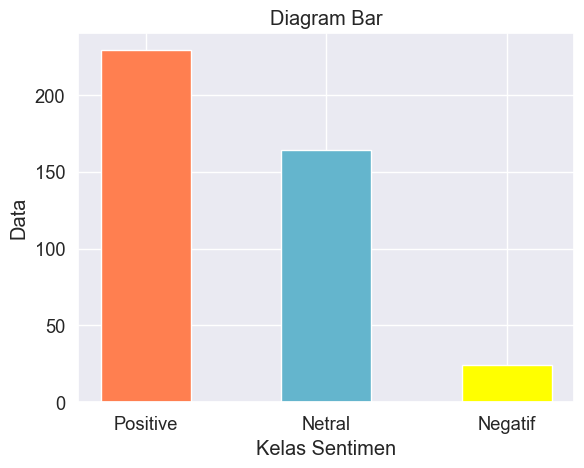

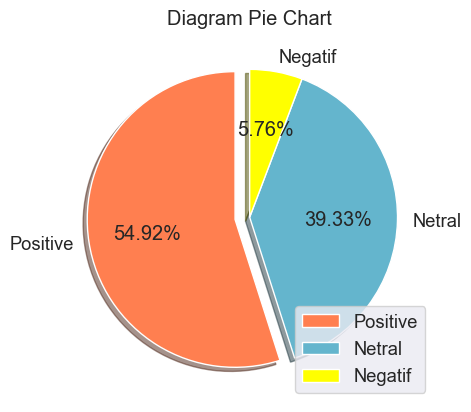

In [5]:
labels = ['Positive','Netral','Negatif']
Category2 = [229,164,24]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [6]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.5, random_state = 1)

In [7]:
# Membuat data frame dari hasil split
df_train50 = pd.DataFrame()
df_train50['Steming'] = train_X
df_train50['Label'] = train_Y

df_test50 = pd.DataFrame()
df_test50['Steming'] = test_X
df_test50['Label'] = test_Y

In [8]:
#Data frame train hasil pembagian
df_train50

,Steming,Label
284,yeay,Positif
113,permisi kakak izin daftar kampus merdeka tangg...,Positif
379,kakak umum kakak tes setelaj daftar,Netral
211,terima khusus program data analyst,Positif
108,terima,Positif
...,...,...
255,sedia jenjang didik kakak,Positif
72,lolos program sib masuk kelompok,Netral
396,office luar tulis akun office officenyaa,Netral
235,cek pesan,Netral


In [9]:
#Data Frame test Hasil Pembagian
df_test50

,Steming,Label
162,min lowong kmren proses terima tolong tolak ng...,Positif
356,hai teman teman test tanggal januari ada umum ...,Positif
228,daftar pathway kakak,Netral
164,hi kakak akun maribelajar non aktif,Netral
173,kakak,Netral
...,...,...
19,hi kakak mohon maaf tidak nyaman masuk kotak m...,Positif
142,hi dear berkas sptjmsr sesuai pretest kirim ta...,Positif
158,hi kakak kakak salah terima kasih,Negatif
286,ringan wakil dekan sj min warek susah lumayan ...,Netral


In [10]:
df_test50.to_csv('instagramcom-test50.csv')

In [11]:
df_train50.to_csv('instagramcom-train50.csv')

In [12]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_5050 = TfidfVectorizer()
tfidf_vect_5050.fit(df['Steming'])
train_X_tfidf_5050 = tfidf_vect_5050.transform(df_train50['Steming'])
test_X_tfidf_5050 = tfidf_vect_5050.transform(df_test50['Steming'])

In [13]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_5050)

  (0, 637)	1.0
  (1, 541)	0.34414138464240823
  (1, 415)	0.48255434574837613
  (1, 337)	0.4267746022429346
  (1, 225)	0.37647883093862883
  (1, 220)	0.31162427592066533
  (1, 199)	0.371758557383373
  (1, 95)	0.29920064368310695
  (2, 596)	0.3733687330495358
  (2, 565)	0.4771761731564531
  (2, 491)	0.6394415956153705
  (2, 220)	0.3414101785674617
  (2, 95)	0.3277990614998007
  (3, 560)	0.317120399848478
  (3, 437)	0.3837740245652599
  (3, 243)	0.5432306522665741
  (3, 99)	0.4298901814400875
  (3, 24)	0.5217729778441633
  (4, 560)	1.0
  (5, 220)	0.3303082409880521
  (5, 143)	0.9438731196169212
  (6, 489)	1.0
  (7, 572)	0.9546046819253042
  (7, 220)	0.2978756472863948
  (8, 535)	0.683385316929495
  :	:
  (202, 585)	0.501293263922403
  (202, 188)	0.5355296471953135
  (202, 52)	0.4184746796351606
  (203, 473)	0.48699930824904664
  (203, 220)	0.1620100121938822
  (203, 209)	0.606870838693823
  (203, 109)	0.606870838693823
  (204, 496)	0.5874664046061414
  (204, 437)	0.3949142679071136
  (204

In [14]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_5050)

  (0, 576)	0.29554681116167525
  (0, 575)	0.36689853575054515
  (0, 560)	0.21418344100350623
  (0, 440)	0.3142309385963137
  (0, 364)	0.4119164617622994
  (0, 343)	0.17828132375665387
  (0, 300)	0.38558266318518364
  (0, 249)	0.38558266318518364
  (0, 175)	0.36689853575054515
  (1, 596)	0.21916890496516706
  (1, 566)	0.2863397685688366
  (1, 555)	0.6422528163716723
  (1, 541)	0.22132123030194917
  (1, 302)	0.32112640818583615
  (1, 205)	0.28010427785953246
  (1, 159)	0.2933104541237005
  (1, 3)	0.3753547147763079
  (2, 405)	0.8657893940081134
  (2, 220)	0.23113081291314985
  (2, 95)	0.4438324825259753
  (3, 371)	0.5349417873084913
  (3, 321)	0.37081473065661213
  (3, 220)	0.14280785952971173
  (3, 168)	0.27233351436775627
  (3, 17)	0.44227974871014286
  :	:
  (205, 168)	0.15558583723106886
  (205, 135)	0.3056155833096764
  (205, 101)	0.2234695528565979
  (205, 66)	0.23881475841128516
  (206, 560)	0.36795265091953017
  (206, 463)	0.6624049104957563
  (206, 229)	0.3915294180481111
  (206

In [15]:
print(train_X_tfidf_5050.shape)
print(test_X_tfidf_5050.shape)

(208, 641)
(209, 641)


In [16]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_5050.vocabulary_)

{'selamat': 475, 'kakak': 220, 'maribelajar': 321, 'uang': 588, 'saku': 462, 'tolong': 576, 'tag': 532, 'kakmaaf': 221, 'malam': 313, 'mohon': 354, 'maaf': 306, 'ganggu': 145, 'buka': 77, 'link': 292, 'format': 138, 'surat': 522, 'nyata': 379, 'tanggung': 543, 'mutlak': 358, 'mahasiswa': 308, 'isi': 194, 'susah': 526, 'hapus': 163, 'sedia': 473, 'harap': 164, 'tanggal': 541, 'terima': 560, 'kasih': 229, 'juta': 216, 'bulan': 78, 'scraping': 471, 'bahasa': 46, 'python': 443, 'ayo': 40, 'ikut': 176, 'giat': 149, 'takut': 535, 'narsumnya': 360, 'mantaaap': 316, 'lupa': 305, 'hadirr': 158, 'main': 309, 'menkrep': 335, 'paket': 398, 'kursus': 270, 'cepat': 84, 'hi': 168, 'latih': 281, 'batchnya': 59, 'lembaga': 284, 'daftar': 95, 'perintah': 412, 'sertifikat': 489, 'bnsp': 72, 'halo': 162, 'usaha': 604, 'kerja': 242, 'teknologi': 551, 'informasi': 185, 'komunikasi': 253, 'swasta': 528, 'indonesia': 181, 'power': 428, 'bi': 68, 'pakai': 397, 'teliti': 554, 'kualitatif': 264, 'wawancara': 619

In [17]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_5050,train_Y)

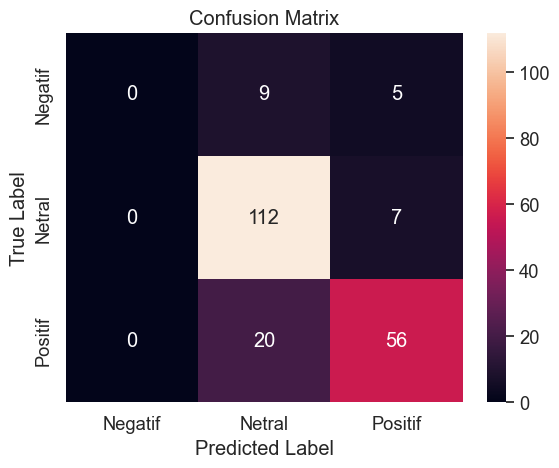

In [18]:
# Proses Pengujian
predictions_SVM_5050 = clf.predict(test_X_tfidf_5050)

#simpan data frame
test_prediction_5050 = pd.DataFrame()
test_prediction_5050['Text'] = test_X
test_prediction_5050['Label'] = predictions_SVM_5050

test_prediction_5050.to_csv('instagramcom-test_prediction_5050.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_5050), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_5050))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_5050))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_5050, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_5050, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_5050, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        14
      Netral       0.79      0.94      0.86       119
     Positif       0.82      0.74      0.78        76

    accuracy                           0.80       209
   macro avg       0.54      0.56      0.55       209
weighted avg       0.75      0.80      0.77       209

Accuracy of the model :  0.8038277511961722
Precision of the model:  0.5392852176331525
Recall of the model:  0.5593395252837977
F1-score of the model:  0.5464387464387465


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [20]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_5050,train_Y)
predictions= clf.predict(test_X_tfidf_5050)

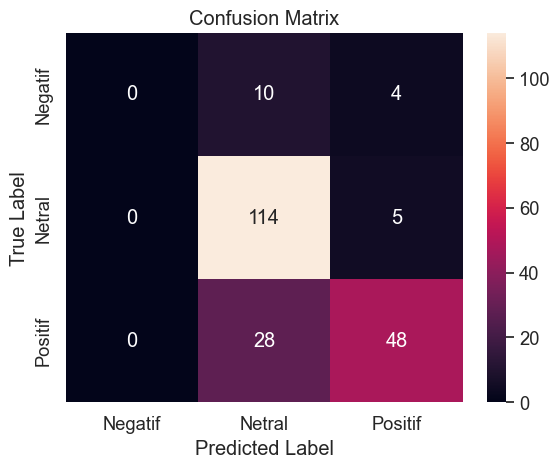

In [21]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        14
      Netral       0.75      0.96      0.84       119
     Positif       0.84      0.63      0.72        76

    accuracy                           0.78       209
   macro avg       0.53      0.53      0.52       209
weighted avg       0.73      0.78      0.74       209

Accuracy of the model :  0.7751196172248804
Precision of the model:  0.5307017543859649
Recall of the model:  0.5298540468819106
F1-score of the model:  0.5210443081874427


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c